Data source: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset/code


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d = pd.read_csv('/content/Resume.csv', engine='python')

In [ ]:
d.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
d['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


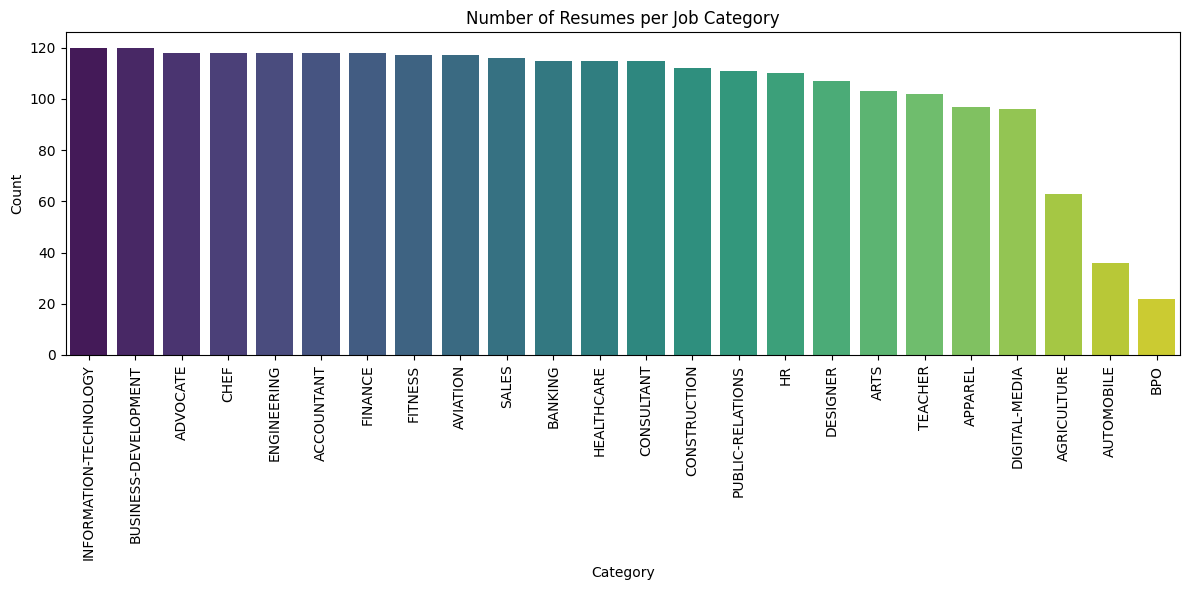

In [ ]:
plt.figure(figsize=(12, 6))
category_counts = d['Category'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", hue=category_counts.index, legend=False)
plt.xticks(rotation=90)
plt.title("Number of Resumes per Job Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()

In [ ]:
import re

In [ ]:
def clean_resume(text):
    #trimming with regular expression
    text = re.sub(r'http\S+\s*', ' ', text) # 1. Remove URLs (http://...)
    text = re.sub(r'RT|cc', ' ', text) # 2. Remove RT and cc (common in some text data)
    text = re.sub(r'#\S+', '', text) # 3. Remove hashtags (#)
    text = re.sub(r'@\S+', ' ', text) # 4. Remove mentions (@)
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) # 5. Remove special characters (keep only words and numbers)
    text = re.sub(r'[^\x00-\x7f]', r' ', text) # 6. Remove non-ASCII characters (weird symbols)
    text = re.sub(r'\s+', ' ', text) # 7. Remove extra whitespace
    return text.lower()

<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:7: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-39022383.py:7: SyntaxWarning: invalid escape sequence '\]'
  text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) # 5. Remove special characters (keep only words and numbers)


In [ ]:
d['cleaned_resume'] = d['Resume_str'].apply(lambda x: clean_resume(x))

In [ ]:
print("Original")
print(d['Resume_str'][0][:200])#First 200 chars
print("\nCleaned")
print(d['cleaned_resume'][0][:200])

Original
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Resp

Cleaned
 hr administrator marketing associate hr administrator summary dedicated customer service manager with 15 years of experience in hospitality and customer service management respected builder and leade


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# stop_words='english' will automatically remove words like "the", "and", "is"
tfidf = TfidfVectorizer(stop_words='english')

#Fit and Transform the cleaned resumes
tfidf_matrix = tfidf.fit_transform(d['cleaned_resume'])

print("Matrix Shape:", tfidf_matrix.shape)

Matrix Shape: (2484, 39996)


In [ ]:
stop_words_list = tfidf.get_stop_words()

print("Total Stop Words:", len(stop_words_list))
print("\nFirst 20 Stop Words")
print(list(stop_words_list)[:20])

Total Stop Words: 318

First 20 Stop Words
['alone', 'i', 'done', 'about', 'by', 'although', 'above', 'can', 'why', 'others', 'two', 'myself', 'never', 'until', 'out', 'once', 'its', 'eg', 'he', 'both']


In [ ]:
d.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admin...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versat...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary over 20 years experience ...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven and dy...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depa...


In [ ]:
print(d.iloc[2]["cleaned_resume"])

 hr director summary over 20 years experience in recruiting 15 plus years in human resources executive management 5 years of hris development and maintenance 4 years working in a healthcare enviroment skills recruiting fmla eeo flsa hris development benefit administration policy development web page development a omplishments kansas health institute health outcomes for the state of kansas 1999 memberships and a olades project management institute member shrm chamber of commerce 1999 friends university president s honor roll 1997 friends university dean s honor roll student liaison for friends university topeka member of mother to mother member of the topeka advertising federation several production pieces created nominated for addy awards received recognition for outstanding customer service assistance by the state of kansas travel and tourism department ashhra kahhr acm additional information leading change i have been instrumental in development and implementation of the adjutant gen

In [ ]:
print(d.iloc[2]["Resume_str"])

         HR DIRECTOR       Summary      Over 20 years experience in recruiting,   15 plus years in Human Resources Executive Management,   5 years of HRIS development and maintenance  4 years working in a Healthcare Enviroment        Skills          Recruiting  FMLA/EEO/FLSA   HRIS Development      Benefit Administration  Policy Development  Web Page Development             Accomplishments      Kansas Health Institute -Health Outcomes for the State of Kansas -1999 
Memberships and Accolades: Project Management Institute Member, SHRM, Chamber of Commerce, 1999 Friends University President's Honor Roll, 1997 Friends University Dean's Honor Roll, Student Liaison for Friends University Topeka (member of Mother-To-Mother, member of the Topeka 
Advertising Federation, several production pieces created nominated for ADDY Awards, received recognition for outstanding customer service assistance by the State of Kansas Travel and Tourism Department., ASHHRA, KAHHR, ACM.  Additional Information: 


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# metric='cosine' calculates the angle between resume vectors (standard for text)
# n_neighbors=6 means we want to find the top 6 matches
model = NearestNeighbors(n_neighbors=6, metric='cosine')

model.fit(tfidf_matrix)


NearestNeighbors(metric='cosine', n_neighbors=6)

In [ ]:
def get_recommendations(job_description):
    cleaned_job = clean_resume(job_description)

    # using .transform(), NOT .fit_transform() because we want to use the EXISTING rules
    job_vector = tfidf.transform([cleaned_job])


    distances, indices = model.kneighbors(job_vector)


    print(f"\nSearching for: '{job_description}'...")
    print("-" * 50)


    for i, index in enumerate(indices[0]):
        # Convert distance to a similarity score (1 - distance = similarity)
        score = (1 - distances[0][i]) * 100

        # Get the actual resume text and category
        resume_category = d['Category'].iloc[index]
        resume_id = d['ID'].iloc[index]

        print(f"Rank {i+1}: Match Score: {score:.2f}% | Category: {resume_category} | ID: {resume_id}")


In [ ]:
get_recommendations("We are looking for a Python Developer with Machine Learning and SQL skills.")


Searching for: 'We are looking for a Python Developer with Machine Learning and SQL skills.'...
--------------------------------------------------
Rank 1: Match Score: 18.33% | Category: CONSULTANT | ID: 30863060
Rank 2: Match Score: 17.18% | Category: ENGINEERING | ID: 12011623
Rank 3: Match Score: 16.44% | Category: DESIGNER | ID: 35990852
Rank 4: Match Score: 16.41% | Category: CONSULTANT | ID: 21156767
Rank 5: Match Score: 16.30% | Category: INFORMATION-TECHNOLOGY | ID: 36434348
Rank 6: Match Score: 16.21% | Category: INFORMATION-TECHNOLOGY | ID: 13385306


In [ ]:
get_recommendations("We are looking for a guy for insurance with experience.")


Searching for: 'We are looking for a guy for insurance with experience.'...
--------------------------------------------------
Rank 1: Match Score: 13.19% | Category: CONSULTANT | ID: 31169070
Rank 2: Match Score: 8.80% | Category: AUTOMOBILE | ID: 24592627
Rank 3: Match Score: 8.60% | Category: BUSINESS-DEVELOPMENT | ID: 17602815
Rank 4: Match Score: 8.50% | Category: FINANCE | ID: 24967652
Rank 5: Match Score: 8.23% | Category: BUSINESS-DEVELOPMENT | ID: 25370801
Rank 6: Match Score: 8.03% | Category: BANKING | ID: 16407619


In [ ]:
# Lets verify
top_match_id = 30863060

# Find the row with that ID
top_resume = d[d['ID'] == top_match_id]['Resume_str'].values[0]

print("--- Top Match Resume Snippet ---")
print(top_resume[:600]) # First 600 characters

--- Top Match Resume Snippet ---
         CONSULTANT       Summary    College graduate with interest in insurance claims work. Proven record of success in all endeavors. Strong work ethic and focus on the details. Excited to begin career in investigative work. Searching for an entry level position as an insurance claims adjuster.      Skills          Unix, SQL Server 2005, SQL Server 2008, SQL Server 2008R2, VM-Ware, ODBC, SQL, PL/SQL, Access, MS Office Suite, MS Visio, Oracle 10g, Oracle 11g, SAP Business Objects BI Suite, PeopleSoft, ADP, and cView SAP Business Objects Suite, MS Reporting Suite, MicroStrategy, MS Office Sui


In [ ]:
hr_text = d['Resume_str'].iloc[13]

get_recommendations(hr_text)


Searching for: '         HR GENERALIST       Summary     A people-oriented, results-driven professional with outstanding communication skills.   Extensive experience delivering top-quality solutions for high-profile clients. Seeking to   obtain a position which would allow me to apply my current knowledge, obtain new information and grow with a company.       Highlights        Word, Excel, PowerPoint, Darwin, Act, Attendance Advisor, ERP/AS400, HRIS, ADP Payroll, Paycor, Internet Explorer, Outlook, Kronos, IFAS, PeopleSoft, Epicor, Winpak, E2, WASP            Accomplishments     Created and implemented Employee Requisition Procedure  Developed and executed Employee Internship/Co-Op Program       Experience      HR Generalist     Sep 2014   to   Current      Company Name   -   City  ,   State     Built the department from the ground up as the first HR person.  This involved putting policies and procedures in place to ensure compliance with          State and Federal law.  A significant

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


X = tfidf_matrix
y = d['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


In [ ]:
print("Accuracy of Classifier:", accuracy_score(y_test, y_pred))

Accuracy of Classifier: 0.5311871227364185


In [ ]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.90      0.84        29
              ADVOCATE       0.62      0.33      0.43        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.80      0.20      0.32        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.63      0.81      0.71        21
               BANKING       0.80      0.52      0.63        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.40      0.63      0.49        27
                  CHEF       0.81      0.71      0.76        24
          CONSTRUCTION       0.95      0.56      0.70        34
            CONSULTANT       0.50      0.05      0.09        20
              DESIGNER       0.82      0.74      0.78        19
         DIGITAL-MEDIA       1.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


These categories likely have generic words (e.g., "Creative," "Growth," "Field") that also appear in "Business Development" or "Design." The model decided it was safer to bet on the bigger categories.

In [ ]:
from sklearn.svm import LinearSVC


clf_svm = LinearSVC(class_weight='balanced', random_state=42)


clf_svm.fit(X_train, y_train)


y_pred_svm = clf_svm.predict(X_test)

In [ ]:
print("Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))

Accuracy of SVM: 0.6740442655935613


In [ ]:
print(classification_report(y_test, y_pred_svm))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.78      0.86      0.82        29
              ADVOCATE       0.64      0.70      0.67        30
           AGRICULTURE       0.50      0.25      0.33         8
               APPAREL       0.57      0.60      0.59        20
                  ARTS       0.33      0.17      0.22        18
            AUTOMOBILE       0.40      0.33      0.36         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.81      0.74      0.77        23
                   BPO       0.20      0.50      0.29         2
  BUSINESS-DEVELOPMENT       0.75      0.44      0.56        27
                  CHEF       0.90      0.75      0.82        24
          CONSTRUCTION       0.88      0.85      0.87        34
            CONSULTANT       0.56      0.25      0.34        20
              DESIGNER       0.71      0.89      0.79        19
         DIGITAL-MEDIA       0.82      

In [ ]:
"""import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(clf_svm, f)

print("Models saved successfully!")

Models saved successfully!


Using NLTK and SpaCy Libraries

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

def clean_resume_nltk(text):
    text = re.sub(r'http\S+\s*', ' ', text)
    text = re.sub(r'RT|cc', ' ', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Tokenize
    words = nltk.word_tokenize(text)

    # Remove Stopwords & Lemmatize
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]

    return " ".join(filtered_words)


<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:6: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-87118556.py:6: SyntaxWarning: invalid escape sequence '\]'
  text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)


In [ ]:
d['cleaned_resume_nltk'] = d['Resume_str'].apply(lambda x: clean_resume_nltk(x))

In [ ]:
print("NLTK Cleaned Text Example")
print(d['cleaned_resume_nltk'][0][:200])

NLTK Cleaned Text Example
hr administrator marketing associate hr administrator summary dedicated customer service manager 15 year experience hospitality customer service management respected builder leader customer focused te


In [ ]:
import spacy

try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    entities = []

    target_labels = ['ORG', 'PERSON', 'GPE']
    # ORG = Companies, GPE = Countries/Cities, PERSON = Names

    for ent in doc.ents:
        if ent.label_ in target_labels:
            entities.append((ent.text, ent.label_))

    return entities


In [ ]:
sample_text = d['Resume_str'][0][:500] # First 500 chars only
print("Extracted Entities")
extracted = extract_entities(sample_text)

Extracted Entities


In [ ]:
for entity in extracted:
    print(entity)

('Hospitality', 'GPE')
('Team', 'ORG')


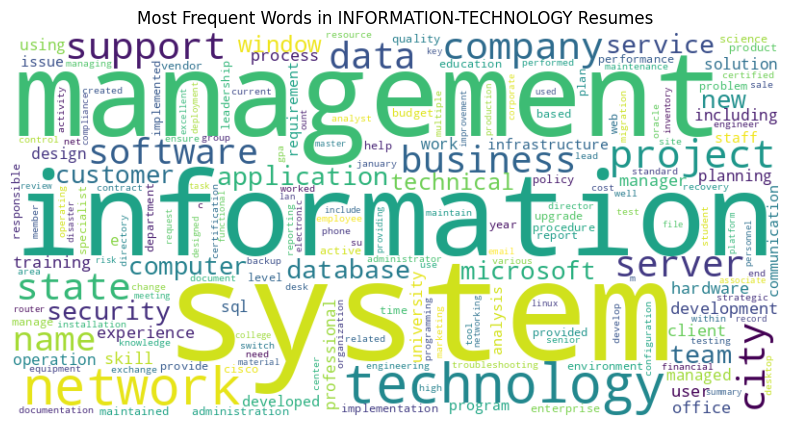

In [ ]:
from wordcloud import WordCloud

target_category = 'INFORMATION-TECHNOLOGY'


subset = d[d['Category'] == target_category]
text = " ".join(subset['cleaned_resume_nltk'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Most Frequent Words in {target_category} Resumes")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC
import pickle

print("Bilding TF-IDF with NLTK-cleaned text...")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(d['cleaned_resume_nltk'])

print("Training KNN ...")
model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(tfidf_matrix)


Bilding TF-IDF with NLTK-cleaned text...
Training KNN ...


NearestNeighbors(metric='cosine', n_neighbors=6)

In [ ]:
def get_recommendations_nltk(job_description):

    cleaned_job = clean_resume_nltk(job_description)

    job_vector = tfidf.transform([cleaned_job])


    distances, indices = model.kneighbors(job_vector)

    print(f"\nSearching for: '{job_description}'...")
    print("-" * 50)

    for i, index in enumerate(indices[0]):
        score = (1 - distances[0][i]) * 100


        category = d['Category'].iloc[index]
        r_id = d['ID'].iloc[index]


        snippet = d['Resume_str'].iloc[index][:50].replace('\n', ' ')

        print(f"Rank {i+1}: Score: {score:.2f}% | Category: {category} | Snippet: {snippet}...")

In [ ]:
hr_query = """
HR Manager with 5 years experience in employee relations, payroll, and training.
Looking for a role in Human Resources management.
"""

get_recommendations_nltk(hr_query)


Searching for: '
HR Manager with 5 years experience in employee relations, payroll, and training.
Looking for a role in Human Resources management.
'...
--------------------------------------------------
Rank 1: Score: 40.85% | Category: HR | Snippet:          HR MANAGER         Skill Highlights      ...
Rank 2: Score: 38.67% | Category: HR | Snippet:          SENIOR HR BUSINESS PARTNER           Summ...
Rank 3: Score: 37.75% | Category: HR | Snippet:          HR CONSULTANT           Summary     Certi...
Rank 4: Score: 37.44% | Category: HR | Snippet:          HR REPRESENTATIVE       Summary    Experi...
Rank 5: Score: 36.77% | Category: HR | Snippet:          HR GENERALIST       Professional Summary ...
Rank 6: Score: 36.75% | Category: HR | Snippet:          HR GENERALIST         Summary    Energeti...


In [ ]:
hr_query = """
         TEACHER       Summary    I taught 5th, 2nd, and 3rd grade for the last fifteen years.Â  I typically worked with general education students, collaboratively teaching with special educations teachers as well.Â Â  Enthusiastic  teacher  effective at providing high quality instruction and fostering a positive learning environment for all students.   Superb leadership, organization, and communication skills. Easily cultivates trusting and productive relationships with students, parents, teachers and administration.   Mature and professionalÂ who adapts to new situations and technologies with ease.Â        Skills           Current Virginia Â postgraduate professional license   Critical thinker   Calm under pressure  Decisive       Mediation and advocacy talent  Curriculum development and long term planning  highly organized  excellent work ethic            Experience     08/2002       Teacher    Company Name   ï¼   City  ,   State     Established positive relationships with students, parents, fellow teachers and school administrators.   Created lesson plans in accordance with state curriculum and school-wide curriculum standards.   Strengthened parent-teacher and parent-child communication by holding regular parent-teacher conferences. Named Teacher of the Year by peers in 2015.        02/2001   to   02/2002     Assistant Teacher    Company Name   ï¼   City  ,   State      Responsible for twenty students ages five to eight years old in a before and after school childcare setting.  Summer camp session full time care for ages five to eleven and includes chaperoning weekly field trips, providing transportation on passenger buses, and knowledge of first aid procedures.         02/1998   to   02/2001     Senior Support Representative    Company Name   ï¼   City  ,   State      Resource for customer service and technical problems for eight on-line support technicians for this E-classified ad service.         02/1996   to   02/1998     Customer Service / Administrator    Company Name   ï¼   City  ,   State      Created and maintained Customer Service Training manual for online classifieds company.  Provided internal and external customer service via e-mail and system troubleshooting.          Education and Training     1998     AA  :   Child Development    DE ANZA College   ï¼   City  ,   State      Cum Laude Child Development       2002     BS  :   Psychology    Virginia Commonwealth University   ï¼   City  ,   State      Psychology Cum Laude       2002     Masters  :   Teaching    Virginia Commonwealth University   ï¼   City  ,   State              Skills     Proficiency with Promethean Board  Computer literacy  Interpersonal skills and communication  â€‹       Activities and Honors     Team leader for second grade team for five years  Teacher of the year at Providence Elementary 2015-2016
"""

get_recommendations_nltk(hr_query)


Searching for: '
         TEACHER       Summary    I taught 5th, 2nd, and 3rd grade for the last fifteen years.Â  I typically worked with general education students, collaboratively teaching with special educations teachers as well.Â Â  Enthusiastic  teacher  effective at providing high quality instruction and fostering a positive learning environment for all students.   Superb leadership, organization, and communication skills. Easily cultivates trusting and productive relationships with students, parents, teachers and administration.   Mature and professionalÂ who adapts to new situations and technologies with ease.Â        Skills           Current Virginia Â postgraduate professional license   Critical thinker   Calm under pressure  Decisive       Mediation and advocacy talent  Curriculum development and long term planning  highly organized  excellent work ethic            Experience     08/2002       Teacher    Company Name   ï¼   City  ,   State     Established positive relation

# Applying SVM and RF models for classification

In [ ]:
print("Training SVM (Classifier)...")
from sklearn.model_selection import train_test_split
X = tfidf_matrix
y = d['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_svm = LinearSVC(class_weight='balanced', random_state=42)
clf_svm.fit(X_train, y_train)


Training SVM (Classifier)...


LinearSVC(class_weight='balanced', random_state=42)

In [ ]:
print(f"Updated SVM Accuracy: {clf_svm.score(X_test, y_test):.2f}")

Updated SVM Accuracy: 0.67


In [ ]:
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.93      0.86        29
              ADVOCATE       0.67      0.73      0.70        30
           AGRICULTURE       0.33      0.12      0.18         8
               APPAREL       0.58      0.55      0.56        20
                  ARTS       0.33      0.17      0.22        18
            AUTOMOBILE       0.40      0.33      0.36         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.85      0.74      0.79        23
                   BPO       0.20      0.50      0.29         2
  BUSINESS-DEVELOPMENT       0.79      0.41      0.54        27
                  CHEF       0.89      0.71      0.79        24
          CONSTRUCTION       0.82      0.82      0.82        34
            CONSULTANT       0.56      0.25      0.34        20
              DESIGNER       0.74      0.89      0.81        19
         DIGITAL-MEDIA       0.90      

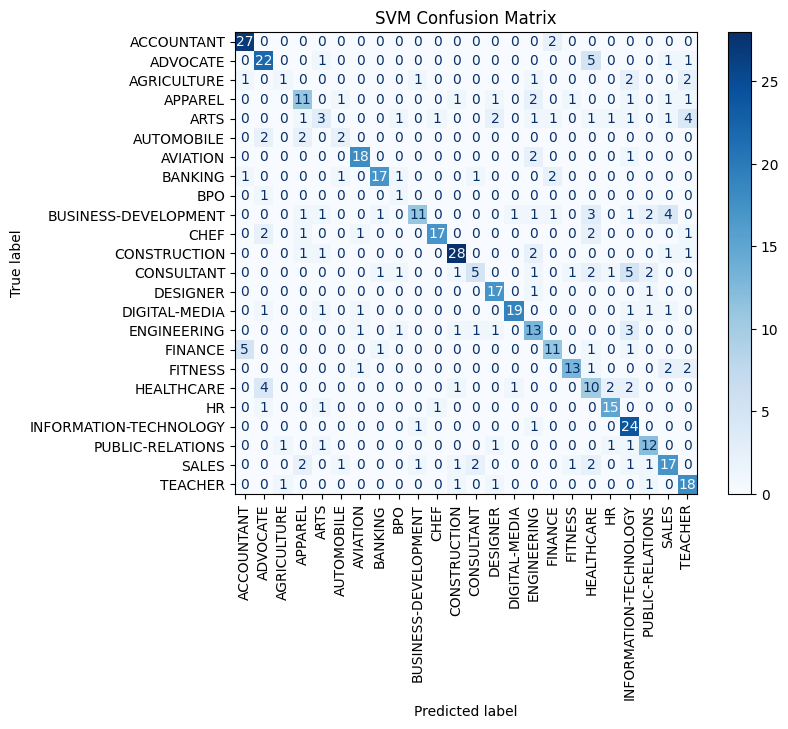

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                                  display_labels=clf_svm.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_svm.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
"""
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(clf_svm, f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("Training Random Forest...")
clf_rf.fit(X_train, y_train)

rf_acc = clf_rf.score(X_test, y_test)

Training Random Forest...


In [ ]:

print(f"Random Forest Accuracy: {rf_acc:.2f}")

Random Forest Accuracy: 0.62


In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.97      0.82        29
              ADVOCATE       0.74      0.67      0.70        30
           AGRICULTURE       0.67      0.25      0.36         8
               APPAREL       0.70      0.35      0.47        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.61      0.90      0.73        21
               BANKING       0.58      0.61      0.60        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.81      0.48      0.60        27
                  CHEF       0.77      0.71      0.74        24
          CONSTRUCTION       0.86      0.71      0.77        34
            CONSULTANT       0.38      0.15      0.21        20
              DESIGNER       0.75      0.95      0.84        19
         DIGITAL-MEDIA       0.78      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


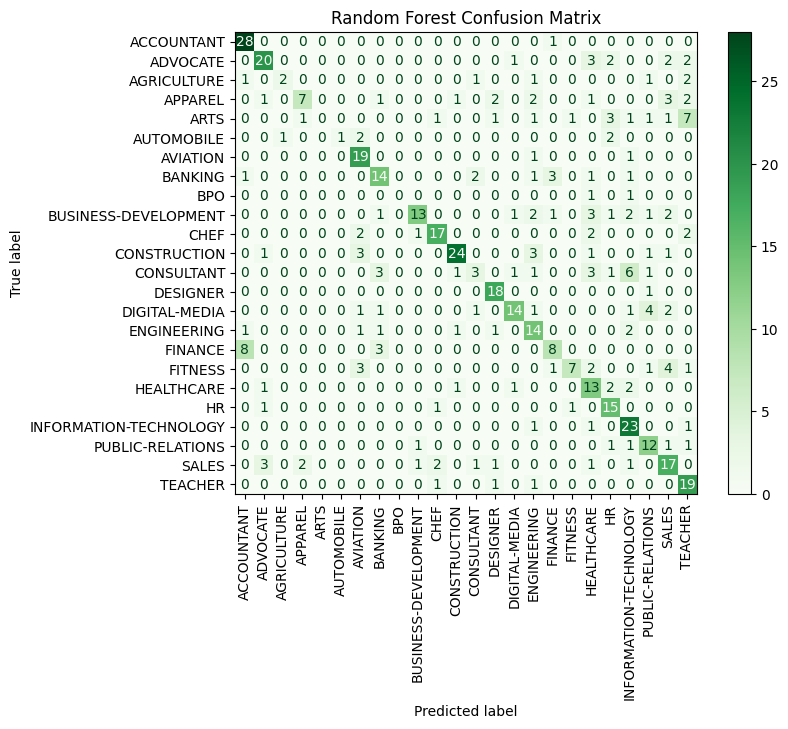

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=clf_rf.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp_rf.plot(ax=ax, cmap='Greens', xticks_rotation=90)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
print("Training XGBoost (Classifier)...")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Features and labels
X = tfidf_matrix
y = d['Category']

# Encode labels (XGBoost requires numeric labels)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Initialize XGBoost classifier
clf_xgb = XGBClassifier(
    objective='multi:softmax',   # For multi-class classification
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train
clf_xgb.fit(X_train, y_train)

# Accuracy
print(f"XGBoost Accuracy: {clf_xgb.score(X_test, y_test):.2f}")

# Predictions
y_pred_xgb = clf_xgb.predict(X_test)

# Classification report (convert back to original labels for readability)
print(classification_report(
    le.inverse_transform(y_test),
    le.inverse_transform(y_pred_xgb)
))


Training XGBoost (Classifier)...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:31:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.74
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.97      0.98        29
              ADVOCATE       0.77      0.80      0.79        30
           AGRICULTURE       0.50      0.38      0.43         8
               APPAREL       0.53      0.50      0.51        20
                  ARTS       0.47      0.39      0.42        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.75      0.65      0.70        23
                   BPO       1.00      0.50      0.67         2
  BUSINESS-DEVELOPMENT       0.87      0.48      0.62        27
                  CHEF       0.90      0.79      0.84        24
          CONSTRUCTION       0.82      0.91      0.86        34
            CONSULTANT       0.60      0.60      0.60        20
              DESIGNER       0.75      0.95      0.84        19
         DIGITAL

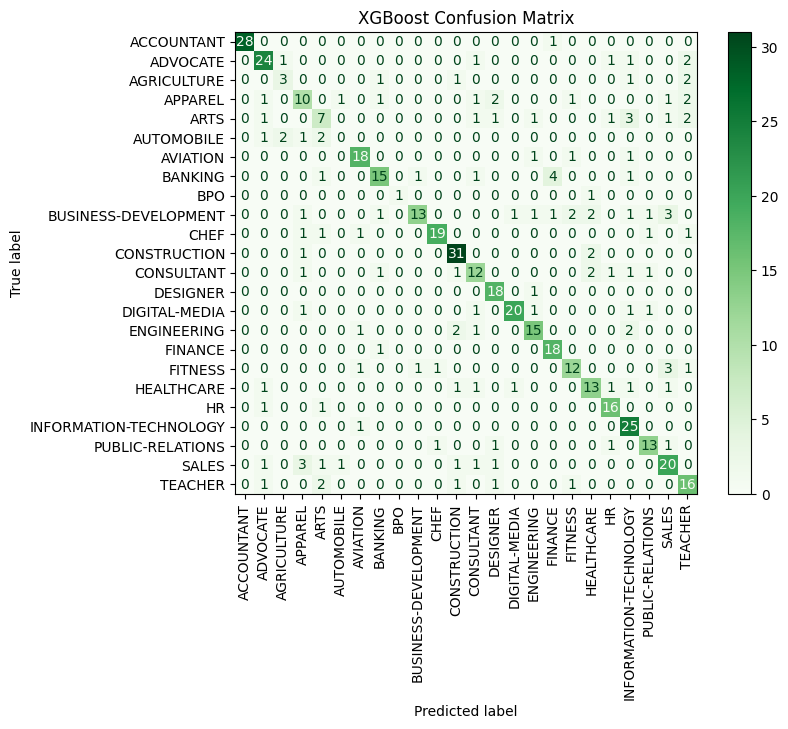

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(
    confusion_matrix=cm_xgb,
    display_labels=le.classes_
)

fig, ax = plt.subplots(figsize=(8, 6))
disp_xgb.plot(ax=ax, cmap='Greens', xticks_rotation=90)

plt.title("XGBoost Confusion Matrix")
plt.show()

## **Highlighting missing skills**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_skill_gap(resume_text, job_description):
    resume_words = set(clean_resume_nltk(resume_text).split())
    jd_words = set(clean_resume_nltk(job_description).split())

    required_skills = {word for word in jd_words if len(word) > 2}

    matched_skills = required_skills.intersection(resume_words)
    missing_skills = required_skills - resume_words

    match_percentage = (len(matched_skills) / len(required_skills)) * 100


    plt.figure(figsize=(10, 6))
    #Donut Chart for Match Score
    plt.subplot(1, 2, 1)
    plt.pie([len(matched_skills), len(missing_skills)],
            labels=['Matched', 'Missing'],
            colors=['#2ecc71', '#e74c3c'],
            autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0))

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)
    plt.title("Skill Match Score")

    plt.subplot(1, 2, 2)
    plt.axis('off') # Turn off chart axis

    missing_list = list(missing_skills)[:10]
    matched_list = list(matched_skills)[:10]

    text_report = (
        f"MATCHED SKILLS ({len(matched_skills)})\n"
        f"---------------------------------\n"
        f"{', '.join(matched_list)}\n\n"
        f"MISSING SKILLS ({len(missing_skills)})\n"
        f"---------------------------------\n"
        f"{', '.join(missing_list)}\n"
        f"{'(...and more)' if len(missing_skills) > 10 else ''}"
    )

    plt.text(0.05, 0.5, text_report, fontsize=12, fontfamily='monospace', va='center')
    plt.title("Skill Gap Analysis")

    plt.tight_layout()
    plt.show()

    return {
        "match_percentage": match_percentage,
        "missing": list(missing_skills)
    }


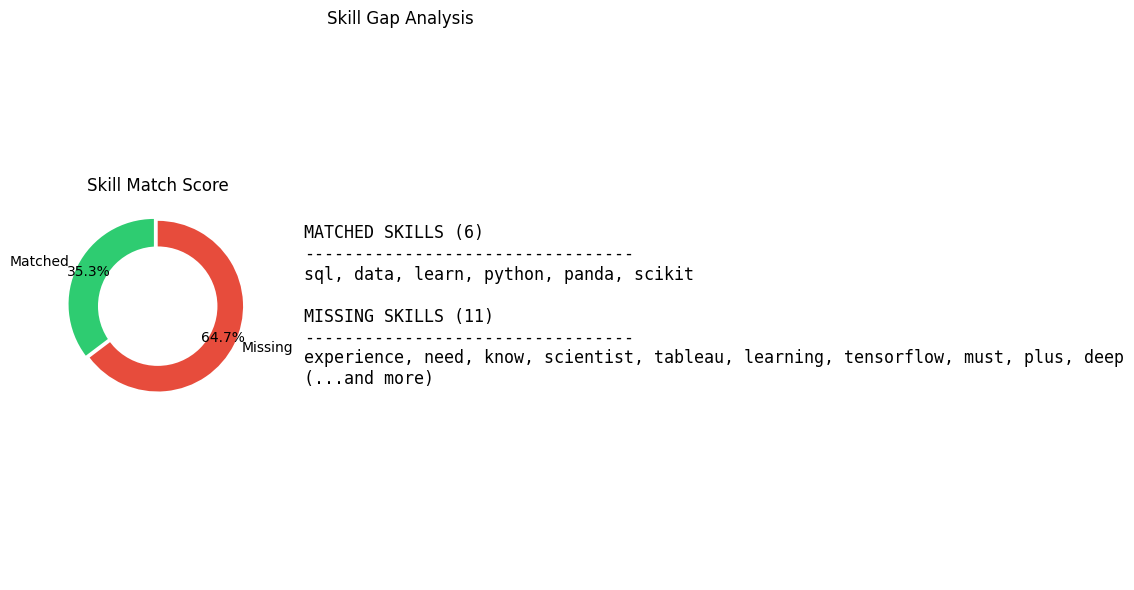

{'match_percentage': 35.294117647058826,
 'missing': ['experience',
  'need',
  'know',
  'scientist',
  'tableau',
  'learning',
  'tensorflow',
  'must',
  'plus',
  'deep',
  'machine']}

In [ ]:
sample_jd = """
We need a Data Scientist with Python, SQL, and Machine Learning experience.
Must know Scikit-Learn, Pandas, and Tableau.
Experience with Deep Learning and TensorFlow is a plus.
"""

sample_resume = """
Experienced Data Analyst with strong Python and SQL skills.
Familiar with Pandas and Scikit-Learn for predictive modeling.
"""

visualize_skill_gap(sample_resume, sample_jd)